In [22]:
from history import History
import matplotlib.pyplot as plt

In [23]:
base_path = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\upgrades\code\results\\'
files = ['5-2-2024-0-5_Kacem_2.json', '5-2-2024-1-5_Kacem_2.json', '5-2-2024-2-5_Kacem_2.json', '5-2-2024-3-5_Kacem_2.json', '5-2-2024-4-5_Kacem_2.json', '5-2-2024-5-5_Kacem_2.json', '5-2-2024-6-5_Kacem_2.json', '5-2-2024-7-5_Kacem_2.json', '5-2-2024-8-5_Kacem_2.json', '5-2-2024-9-5_Kacem_2.json']
files = ['6-2-2024-0-5_Kacem_3.json', '6-2-2024-1-5_Kacem_3.json', '6-2-2024-2-5_Kacem_3.json', '6-2-2024-3-5_Kacem_3.json', '6-2-2024-4-5_Kacem_3.json', '6-2-2024-5-5_Kacem_3.json', '6-2-2024-6-5_Kacem_3.json', '6-2-2024-7-5_Kacem_3.json', '6-2-2024-8-5_Kacem_3.json', '6-2-2024-9-5_Kacem_3.json']
files = ['6-2-2024-0-6_Fattahi_10.json', '6-2-2024-1-6_Fattahi_10.json', '6-2-2024-2-6_Fattahi_10.json', '6-2-2024-3-6_Fattahi_10.json', '6-2-2024-4-6_Fattahi_10.json', '6-2-2024-5-6_Fattahi_10.json', '6-2-2024-6-6_Fattahi_10.json', '6-2-2024-7-6_Fattahi_10.json', '6-2-2024-8-6_Fattahi_10.json', '6-2-2024-9-6_Fattahi_10.json']

In [24]:
data : list[History] = []
for entry in files:
    data.append(History.from_file(f'{base_path}{entry}'))

In [25]:
print(data[2].overall_best[-1][1])

[[[9, 1, 7, 8, 1, 3, 2, 2, 4, 7, 5, 8, 0, 9, 2, 5, 6, 0, 3, 0, 3, 4, 1, 6, 6, 4, 8, 7, 9, 5], [2, 0, 9, 0, 9, 2, 9, 8, 4, 3, 8, 6, 8, 5, 3, 5, 3, 5, 0, 6, 2, 7, 8, 5, 3, 6, 1, 4, 6, 8]]]


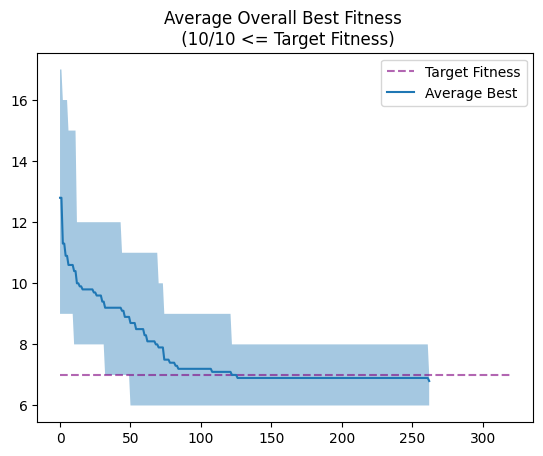

In [26]:
plot_data_x = []
plot_data_lb = []
plot_data_ub = []
max_length = 0
max_restarts = 0
reached_best = 0
for entry in data:
    if entry.overall_best[-1][0] <= entry.target_fitness:
        reached_best+=1
    if len(entry.overall_best) > max_length:
        max_length = len(entry.overall_best)
    if len(entry.restart_generations) > max_restarts:
        max_restarts = len(entry.restart_generations)
for i in range(max_length):
    average = 0.0
    participants = 0
    plot_data_lb.append(float('inf'))
    plot_data_ub.append(0)
    for j in range(len(data)):
        if len(data[j].overall_best) > i:
            average+=data[j].overall_best[i][0]
            participants+=1
            if data[j].overall_best[i][0] < plot_data_lb[i]:
                plot_data_lb[i] = data[j].overall_best[i][0]
            if data[j].overall_best[i][0] > plot_data_ub[i]:
                plot_data_ub[i] = data[j].overall_best[i][0]
        # fill data with last datapoint 
        else:
            average+=data[j].overall_best[-1][0]
            participants+=1
            if data[j].overall_best[-1][0] < plot_data_lb[i]:
                plot_data_lb[i] = data[j].overall_best[-1][0]
            if data[j].overall_best[-1][0] > plot_data_ub[i]:
                plot_data_ub[i] = data[j].overall_best[-1][0]
    average = average/participants
    plot_data_x.append(average)
restart_lb = []
restart_x = []
restart_ub = []
for i in range(max_restarts):
    average = 0.0
    participants = 0
    restart_lb.append(float('inf'))
    restart_ub.append(0)
    for j in range(len(data)):
        if len(data[j].restart_generations) > i:
            average+=data[j].restart_generations[i]
            participants += 1
            if data[j].restart_generations[i] < restart_lb[i]:
                restart_lb[i] = data[j].restart_generations[i]
            if data[j].restart_generations[i] > restart_ub[i]:
                restart_ub[i] = data[j].restart_generations[i]
    average = average/participants
    restart_x.append(average)
#for i in range(len(restart_x)):
#    plt.axvspan(restart_lb[i], restart_ub[i], color='red', alpha=0.2)
#plt.vlines(restart_x, 5, 19, color='red', alpha=0.5)
plt.hlines([data[0].target_fitness], 0, 320, linestyles='dashed', colors='purple', alpha=0.6, label='Target Fitness')
plt.plot(plot_data_x, label='Average Best')
plt.title(f'Average Overall Best Fitness \n ({reached_best}/{len(data)} <= Target Fitness)')
plt.legend()
plt.fill_between(range(len(plot_data_x)), plot_data_lb, plot_data_ub, alpha=.4)

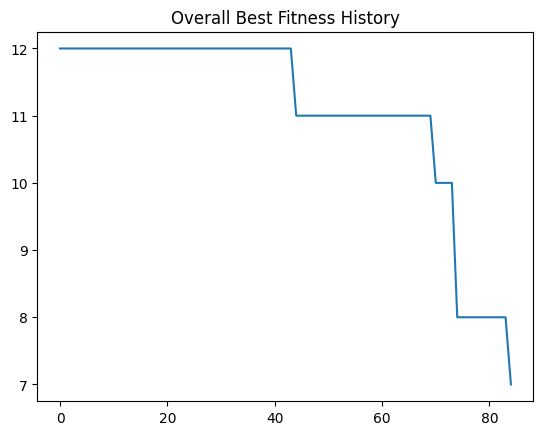

In [27]:
plt.title('Overall Best Fitness History')
plt.plot(data[2].overall_best_fitness())

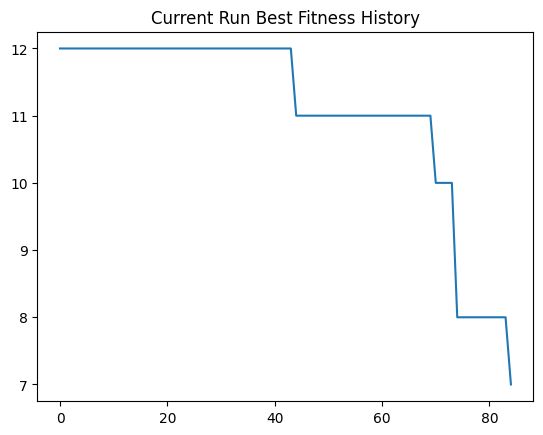

In [28]:
plt.title('Current Run Best Fitness History')
plt.plot(data[2].run_best_fitness())

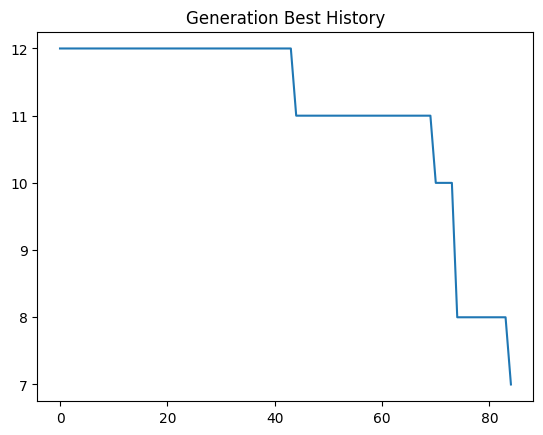

In [29]:
plt.title('Generation Best History')
plt.plot(data[2].generation_best_fitness())

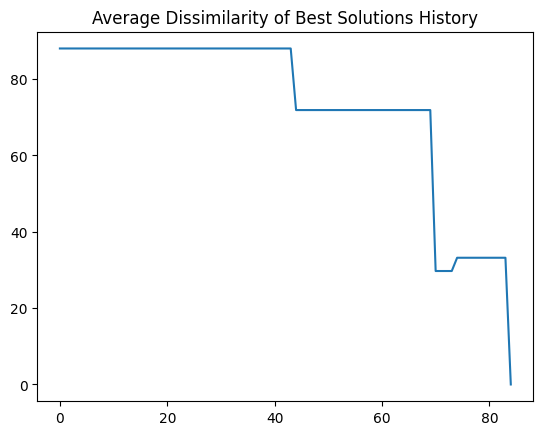

In [30]:
overall_dissimilarity = data[2].average_dissimilarity_history('overall')
plt.title('Average Dissimilarity of Best Solutions History')
plt.plot(overall_dissimilarity)

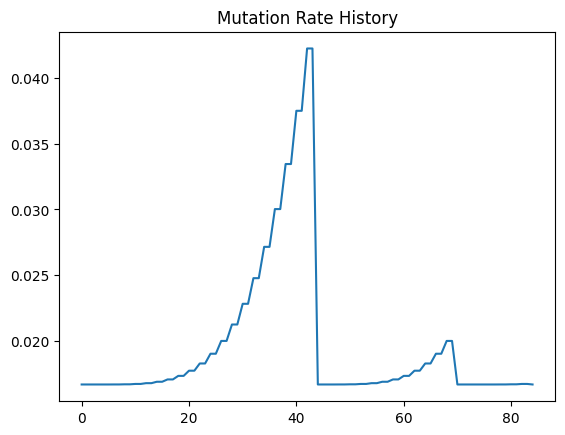

In [31]:
plt.title('Mutation Rate History')
plt.plot(data[2].mutation_probability)

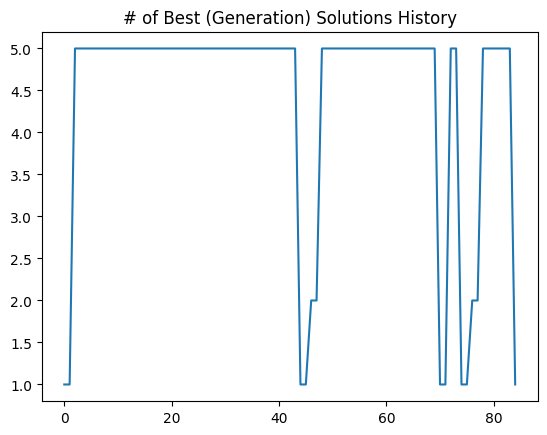

In [32]:
plt.title('# of Best (Generation) Solutions History')
plt.plot(data[2].get_amount_best_generation_history())

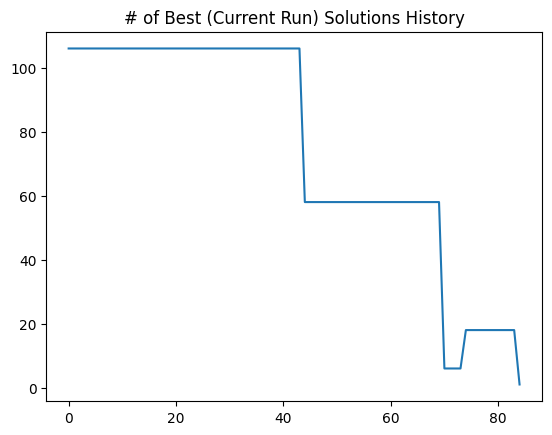

In [33]:
plt.title('# of Best (Current Run) Solutions History')
plt.plot(data[2].get_amount_best_run_history())


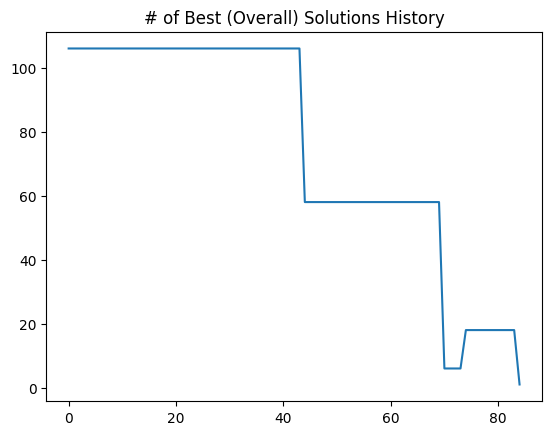

In [34]:
plt.title('# of Best (Overall) Solutions History')
plt.plot(data[2].get_amount_best_overall_history())

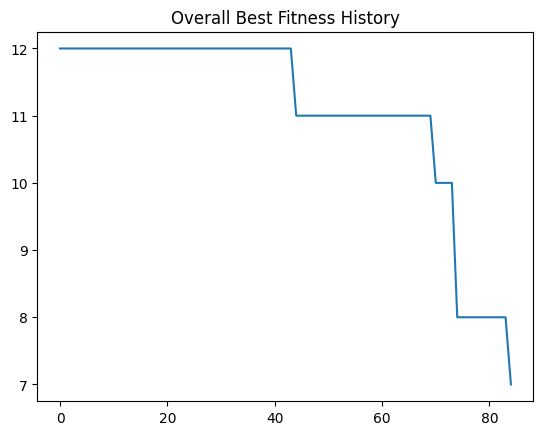

In [35]:
plt.title('Overall Best Fitness History')
plt.plot(data[2].overall_best_fitness())

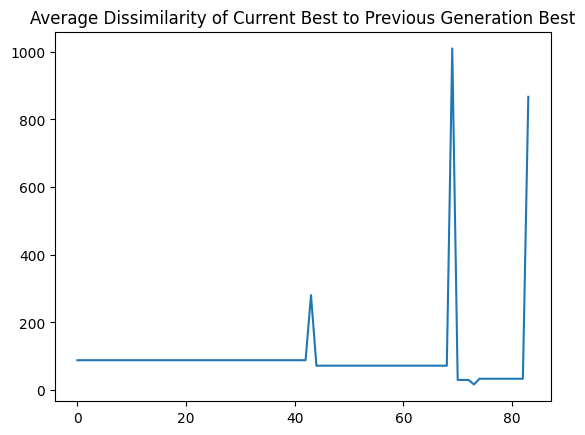

In [36]:
plt.title('Average Dissimilarity of Current Best to Previous Generation Best')
plt.plot(data[2].average_dissimilarity_prev_generation())

In [37]:
print(data[2].summary())

Instance: 5_Kacem_3
------------------
Result
Best Fitness: 7
Generations: 42/None	Function Evaluations: 845/None	Runtime: 0.12442922592163086/3600	Target Fitness: 7	Restarts: 0
------------------
Starting Parameters
Population Size: 5	Offspring Amount: 20	Population Growth (on restart): 2
Restart Time: 50	Max. Mutation Rate: 1.0	Elitism: 0.1	Tournament Size: 0.2


In [38]:
data[1].overall_best[-1][1]

[[[2,
   7,
   9,
   8,
   4,
   6,
   3,
   1,
   0,
   0,
   8,
   2,
   0,
   6,
   7,
   9,
   4,
   2,
   1,
   6,
   3,
   5,
   5,
   3,
   1,
   7,
   4,
   9,
   8,
   5],
  [6,
   4,
   1,
   0,
   2,
   4,
   7,
   3,
   4,
   6,
   4,
   3,
   3,
   4,
   5,
   5,
   2,
   3,
   4,
   2,
   2,
   4,
   3,
   5,
   8,
   8,
   8,
   0,
   9,
   3]]]

In [39]:
import pandas as pd
data_for_df = [x.__dict__ for x in data]
df = pd.DataFrame(data_for_df)

In [40]:
df

,instance,overall_best,run_best,generation_best,mutation_probability,restart_generations,time_checkpoints,function_evaluations,generations,runtime,...,max_generations,target_fitness,function_evaluation_limit,generations_reached,time_exceeded,function_evaluations_exceeded,target_fitness_reached,required_operations,available_machines,durations
0,5_Kacem_3,"[[15, [[[4, 6, 9, 3, 3, 3, 2, 5, 0, 8, 7, 6, 8...","[[15, [[[4, 6, 9, 3, 3, 3, 2, 5, 0, 8, 7, 6, 8...","[[15, [[[4, 6, 9, 3, 3, 3, 2, 5, 0, 8, 7, 6, 8...","[0.016666666666666666, 0.016666666666666666, 0...",[],[],1265,63,0.250039,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, ...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, ...","[[1, 4, 6, 9, 3, 5, 2, 8, 9, 5], [4, 1, 1, 3, ..."
1,5_Kacem_3,"[[15, [[[9, 9, 5, 3, 0, 5, 5, 2, 1, 6, 4, 9, 3...","[[15, [[[9, 9, 5, 3, 0, 5, 5, 2, 1, 6, 4, 9, 3...","[[15, [[[9, 9, 5, 3, 0, 5, 5, 2, 1, 6, 4, 9, 3...","[0.016666666666666666, 0.016666666666666666, 0...",[],[],745,37,0.132935,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, ...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, ...","[[1, 4, 6, 9, 3, 5, 2, 8, 9, 5], [4, 1, 1, 3, ..."
2,5_Kacem_3,"[[12, [[[4, 6, 5, 7, 0, 8, 4, 8, 9, 1, 3, 2, 3...","[[12, [[[4, 6, 5, 7, 0, 8, 4, 8, 9, 1, 3, 2, 3...","[[12, [[[4, 6, 5, 7, 0, 8, 4, 8, 9, 1, 3, 2, 3...","[0.016666666666666666, 0.016666666666666666, 0...",[],[],845,42,0.124429,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, ...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, ...","[[1, 4, 6, 9, 3, 5, 2, 8, 9, 5], [4, 1, 1, 3, ..."
3,5_Kacem_3,"[[9, [[[1, 6, 7, 7, 6, 2, 8, 1, 7, 8, 5, 3, 8,...","[[9, [[[1, 6, 7, 7, 6, 2, 8, 1, 7, 8, 5, 3, 8,...","[[9, [[[1, 6, 7, 7, 6, 2, 8, 1, 7, 8, 5, 3, 8,...","[0.016666666666666666, 0.016666666666666666, 0...",[],[],325,16,0.069854,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, ...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, ...","[[1, 4, 6, 9, 3, 5, 2, 8, 9, 5], [4, 1, 1, 3, ..."
4,5_Kacem_3,"[[11, [[[6, 9, 2, 5, 1, 8, 1, 7, 0, 5, 3, 0, 4...","[[11, [[[6, 9, 2, 5, 1, 8, 1, 7, 0, 5, 3, 0, 4...","[[11, [[[6, 9, 2, 5, 1, 8, 1, 7, 0, 5, 3, 0, 4...","[0.016666666666666666, 0.016666666666666666, 0...",[],[],785,39,0.120222,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, ...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, ...","[[1, 4, 6, 9, 3, 5, 2, 8, 9, 5], [4, 1, 1, 3, ..."
5,5_Kacem_3,"[[12, [[[5, 7, 6, 4, 0, 2, 6, 8, 8, 2, 1, 7, 1...","[[12, [[[5, 7, 6, 4, 0, 2, 6, 8, 8, 2, 1, 7, 1...","[[12, [[[5, 7, 6, 4, 0, 2, 6, 8, 8, 2, 1, 7, 1...","[0.016666666666666666, 0.016666666666666666, 0...",[],[],825,41,0.116684,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, ...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, ...","[[1, 4, 6, 9, 3, 5, 2, 8, 9, 5], [4, 1, 1, 3, ..."
6,5_Kacem_3,"[[11, [[[8, 4, 0, 0, 1, 1, 9, 6, 8, 0, 2, 3, 2...","[[11, [[[8, 4, 0, 0, 1, 1, 9, 6, 8, 0, 2, 3, 2...","[[11, [[[8, 4, 0, 0, 1, 1, 9, 6, 8, 0, 2, 3, 2...","[0.016666666666666666, 0.016666666666666666, 0...",[],[],505,25,0.087161,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, ...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, ...","[[1, 4, 6, 9, 3, 5, 2, 8, 9, 5], [4, 1, 1, 3, ..."
7,5_Kacem_3,"[[16, [[[2, 4, 8, 4, 2, 3, 1, 9, 0, 3, 5, 7, 1...","[[16, [[[2, 4, 8, 4, 2, 3, 1, 9, 0, 3, 5, 7, 1...","[[16, [[[2, 4, 8, 4, 2, 3, 1, 9, 0, 3, 5, 7, 1...","[0.016666666666666666, 0.016666666666666666, 0...",[],[],1085,54,0.181992,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, ...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, ...","[[1, 4, 6, 9, 3, 5, 2, 8, 9, 5], [4, 1, 1, 3, ..."
8,5_Kacem_3,"[[10, [[[0, 3, 8, 0, 7, 4, 9, 8, 6, 1, 6, 3, 6...","[[10, [[[0, 3, 8, 0, 7, 4, 9, 8, 6, 1, 6, 3, 6...","[[10, [[[0, 3, 8, 0, 7, 4, 9, 8, 6, 1, 6, 3, 6...","[0.01